In [1]:
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
import math
import gc
import plotly as pl
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.isnull().sum() / len(data) *100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [0]:
data = data[data['price'] != 0.000000]

In [8]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [0]:
data.rename(columns = {'neighbourhood_group':'borough'},inplace=True)

In [10]:
data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0





*   The price of listing price starts from 10 USD and goes as high as  $10000 USD.

Lets dive in a little deeper to see how the location affects the price



In [11]:
borough_room = pd.DataFrame(data.groupby(['borough','room_type'])['room_type'].count().unstack().reset_index())
borough_room

room_type,borough,Entire home/apt,Private room,Shared room
0,Bronx,379,651,60
1,Brooklyn,9558,10126,411
2,Manhattan,13198,7982,480
3,Queens,2096,3372,198
4,Staten Island,176,188,9


In [0]:
home = (np.sum(borough_room['Entire home/apt']) / (np.sum(borough_room['Entire home/apt']) + np.sum(borough_room['Private room']) + np.sum(borough_room['Shared room']) ) ) * 100
private = (np.sum(borough_room['Private room']) / (np.sum(borough_room['Entire home/apt']) + np.sum(borough_room['Private room']) + np.sum(borough_room['Shared room']) ) ) * 100
shared = (np.sum(borough_room['Shared room']) / (np.sum(borough_room['Entire home/apt']) + np.sum(borough_room['Private room']) + np.sum(borough_room['Shared room']) ) ) * 100

In [13]:
new_df = pd.DataFrame()
new_df['Accomodation type'] = ['Entire home/apt', 'Private room', 'Shared room']
new_df['Availibility'] = [home, private, shared]
new_df

,Accomodation type,Availibility
0,Entire home/apt,51.974061
1,Private room,45.657066
2,Shared room,2.368873


In [14]:
fig_pie = px.pie(new_df, values =  'Availibility', names = 'Accomodation type', title = 'Distribution of accomodation type in NYC')
fig_pie.show()

In [0]:
borough_room_columns = list(borough_room.columns)[1:]

In [0]:
borough_room_long = borough_room.melt(id_vars = ['borough'], value_vars = borough_room_columns, var_name= 'Room Type', value_name = 'Count of Rooms')

In [17]:
borough_room_long.head()

,borough,Room Type,Count of Rooms
0,Bronx,Entire home/apt,379
1,Brooklyn,Entire home/apt,9558
2,Manhattan,Entire home/apt,13198
3,Queens,Entire home/apt,2096
4,Staten Island,Entire home/apt,176


In [18]:

px.bar(borough_room_long,
      x = 'borough',
      y = 'Count of Rooms',
      color = 'Room Type',
      barmode='group',
      template ='plotly_white',
      title = {
          'text':'Borough wise accomodation analysis',
          'x':0.5,
          'y':0.85
        
      },
      labels={
          'borough':'Borough',
           "Count of Rooms": "No. of Availabilities",
          'Room Type':'Accomodation Type'
           
       }
      )

In [19]:
borough_room

room_type,borough,Entire home/apt,Private room,Shared room
0,Bronx,379,651,60
1,Brooklyn,9558,10126,411
2,Manhattan,13198,7982,480
3,Queens,2096,3372,198
4,Staten Island,176,188,9


In [0]:
borough_room_percent = borough_room.copy()

In [0]:
borough_room_percent['Entire home/apt'] = (borough_room_percent['Entire home/apt'] /np.sum(borough_room_percent['Entire home/apt'])) *100
borough_room_percent['Private room'] = (borough_room_percent['Private room'] /np.sum(borough_room_percent['Private room'])) *100
borough_room_percent['Shared room'] = (borough_room_percent['Shared room'] /np.sum(borough_room_percent['Shared room'])) *100

In [22]:
borough_room_percent

room_type,borough,Entire home/apt,Private room,Shared room
0,Bronx,1.491715,2.916797,5.181347
1,Brooklyn,37.619554,45.369416,35.492228
2,Manhattan,51.946314,35.763251,41.450777
3,Queens,8.249695,15.108204,17.098446
4,Staten Island,0.692722,0.842332,0.777202


In [0]:
borough_room_percent_long = borough_room_percent.melt(id_vars = ['borough'], value_vars = borough_room_columns, var_name= 'Room Type', value_name = 'Percent of Rooms')

In [24]:

px.bar(borough_room_percent_long,
      x = 'borough',
      y = 'Percent of Rooms',
      color = 'Room Type',
      barmode='group',
      template ='plotly_white',
      title = {
          'text':'Borough wise accomodation analysis',
          'x':0.5,
          'y':0.85
        
      },
      labels={
          'borough':'Borough',
           "Count of Rooms": "No. of Availabilities",
          'Room Type':'Accomodation Type'
           
       }
      )

No handles with labels found to put in legend.


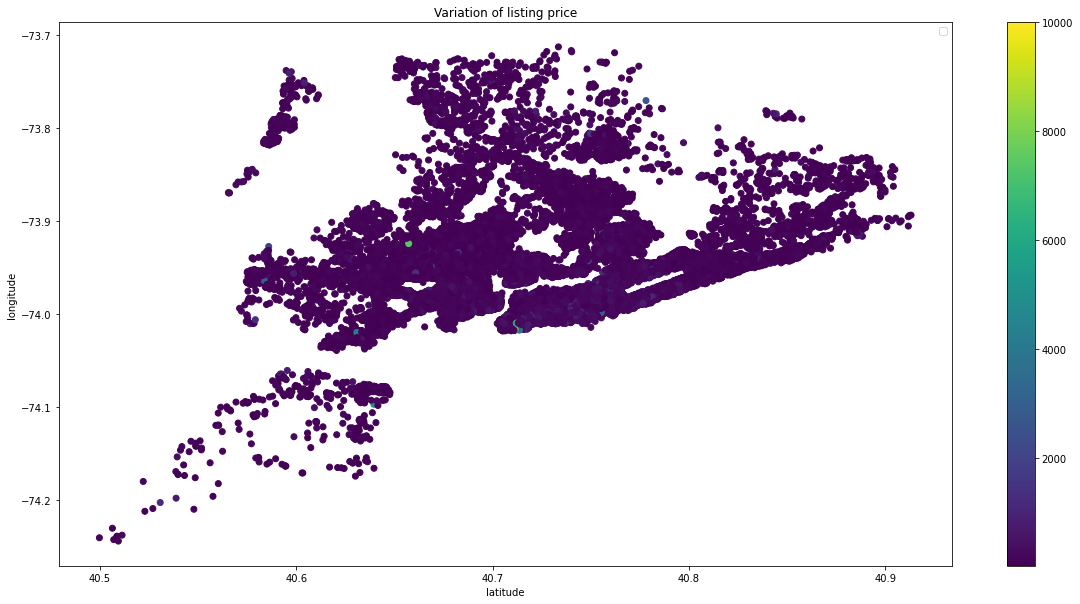

In [25]:
x = data['latitude']
y = data['longitude']
price = data['price']
plt.figure(figsize = (20,10))
plt.scatter(x,y, c = price)
plt.colorbar()
plt.title('Variation of listing price')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()


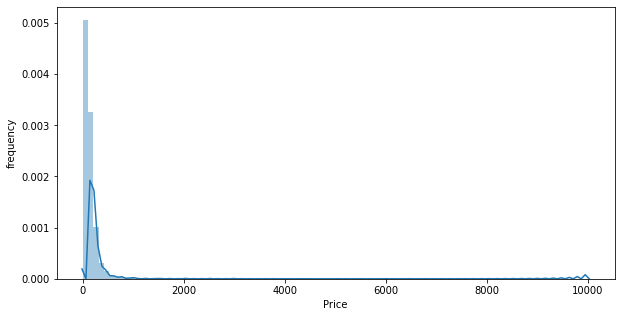

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(data['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('frequency')
plt.show()

Log transformation needs to be performed as price is rightly skewed

In [0]:
data['log price'] = np.log(data['price'])

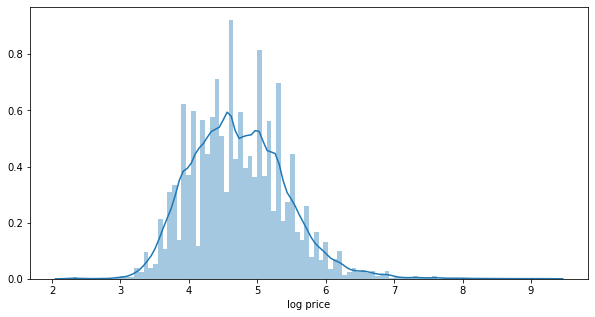

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(data['log price'], bins=100)
plt.show()

Post log transformation, price seems to be somewhat normally distributed

In [29]:
#getting numeric columns
numeric = data.select_dtypes(include = np.number).columns.tolist()
numeric

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'log price']

In [0]:
#droping id columns
numeric = numeric[2:]

In [31]:
len(numeric)

9

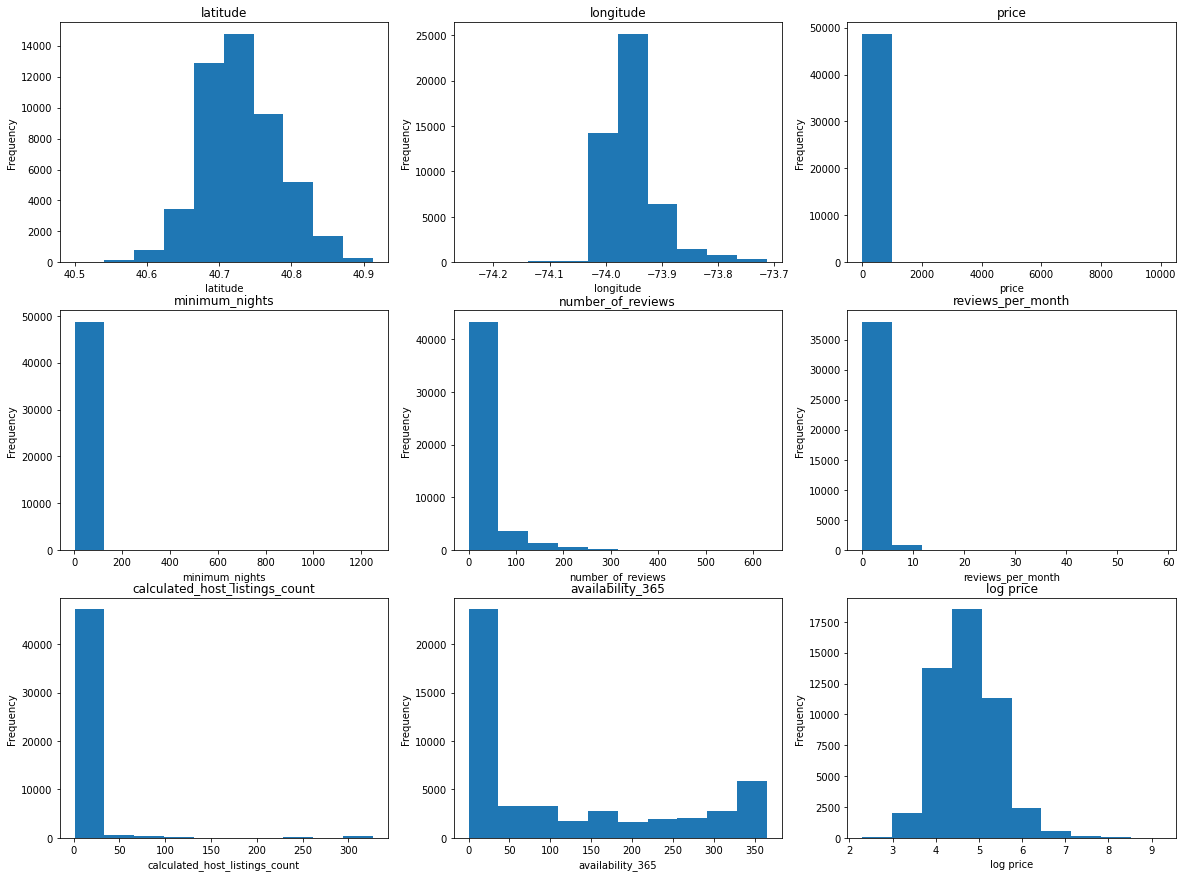

In [32]:
fig, axes = plt.subplots(3,3,figsize= (20,15))
axes = axes.flatten()
for i,ax in enumerate(axes):
  ax.hist(data[numeric[i]])
  ax.set_xlabel(numeric[i])
  ax.set_ylabel('Frequency')
  ax.set_title(numeric[i])
plt.show()

In [0]:
numeric.remove('price')

In [34]:
numeric[2:-1]

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [35]:
data.isnull().sum() / len(data) *100

id                                 0.000000
name                               0.032731
host_id                            0.000000
host_name                          0.042959
borough                            0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
log price                          0.000000
dtype: float64

In [36]:
data['last_review'].mode()


0    2019-06-23
dtype: object

In [37]:
data['last_review'].fillna('2019-06-23',inplace=True)
data['last_review'].isnull().sum()

0

In [38]:
data['reviews_per_month'].mode()


0    0.02
dtype: float64

In [39]:
data['reviews_per_month'].fillna('0.02', inplace=True)
data['reviews_per_month'].isnull().sum()

0

In [0]:
data['last_review'] = pd.to_datetime(data['last_review'])
data['reviews_per_month'] = np.array(data['reviews_per_month']).astype(float)

In [0]:
for i in numeric[2:-1]:
  data['log ' + i] = np.log(data[i]+1)


In [42]:
data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.416100,0.693147,3.828641,0.322083,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.488636,0.693147,5.602119,1.729884,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027,2.397895,2.302585,0.095310,0.693147,0.000000


In [43]:
numeric

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'log price']

In [0]:
for i in numeric[2:-1]:
  data.drop(i,1,inplace=True)

In [45]:
data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,last_review,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,2018-10-19,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,2019-05-21,5.416100,0.693147,3.828641,0.322083,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,2019-06-23,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,2019-07-05,4.488636,0.693147,5.602119,1.729884,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,2018-11-19,4.382027,2.397895,2.302585,0.095310,0.693147,0.000000


In [0]:
#One hot encoding the categorical variables
bor = pd.get_dummies(data['borough'])
neigh = pd.get_dummies(data['neighbourhood'])

data = pd.concat([data, bor],1)

In [47]:
data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,last_review,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,2018-10-19,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,2019-05-21,5.416100,0.693147,3.828641,0.322083,1.098612,5.874931,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,2019-06-23,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,2019-07-05,4.488636,0.693147,5.602119,1.729884,0.693147,5.273000,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,2018-11-19,4.382027,2.397895,2.302585,0.095310,0.693147,0.000000,0,0,1,0,0


Outlier detection and removal if it exists

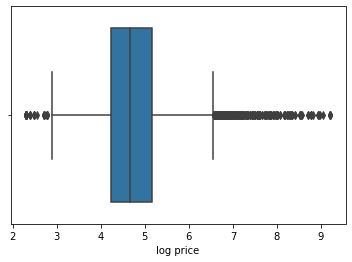

In [48]:
sns.boxplot(data['log price'])

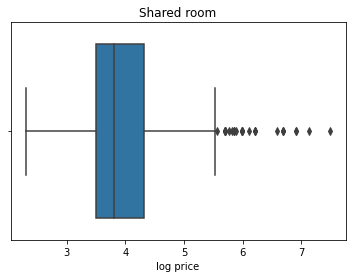

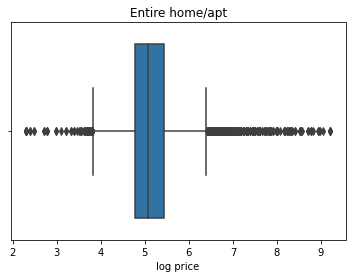

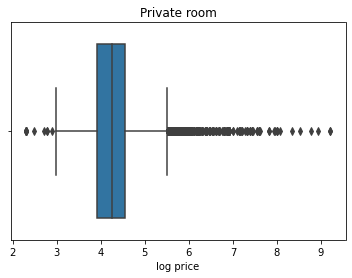

In [49]:
room_type = list(set(data['room_type']))
for i in room_type:
  new = data[data['room_type'] == i]
  sns.boxplot(new['log price'])
  plt.title(i)
  plt.show()

In [0]:
def remove_outlier(dataframe, room_type):
  new = dataframe[dataframe['room_type'] == room_type]
  Q1 = new['log price'].quantile(0.25)
  Q3 = new['log price'].quantile(0.75)
  IQR = Q3 - Q1
  filter = (new['log price'] >= (Q1 - (1.5 * IQR))) & (new['log price'] <= (Q3 + (1.5 * IQR)))
  return new.loc[filter]

In [51]:
print(set(data['room_type']))

{'Shared room', 'Entire home/apt', 'Private room'}


In [52]:
shared_price = remove_outlier(data,'Shared room')
print('Outliers removed: ', len(data[data['room_type'] == 'Shared room']) - len(shared_price))

Outliers removed:  30


In [53]:
entire_home_price = remove_outlier(data,'Entire home/apt')
print('Outliers removed: ', len(data[data['room_type'] == 'Entire home/apt']) - len(entire_home_price))

Outliers removed:  742


In [54]:
private_price = remove_outlier(data,'Private room')
print('Outliers removed: ', len(data[data['room_type'] == 'Private room']) - len(private_price))

Outliers removed:  601


In [0]:
new_data = pd.DataFrame()
new_data = new_data.append([private_price, entire_home_price, shared_price])

In [56]:
print('Total outliers removed: ', len(data)- len(new_data))

Total outliers removed:  1373


In [57]:
new_data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,last_review,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,2018-10-19,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633,0,1,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,2019-06-23,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633,0,0,1,0,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,2017-10-05,4.094345,3.828641,3.912023,0.336472,0.693147,0.000000,0,1,0,0,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2019-06-24,4.369448,1.098612,6.066108,1.497388,0.693147,5.398163,0,0,1,0,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2017-07-21,4.369448,1.098612,4.779123,0.688135,0.693147,0.000000,0,0,1,0,0


In [0]:
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [0]:
new_data.drop('price',1, inplace=True)

In [0]:
room_onehot = pd.get_dummies(new_data['room_type'])
new_data = pd.concat([new_data, room_onehot],1)


In [61]:
new_data.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,last_review,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,2018-10-19,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633,0,1,0,0,0,0,1,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,2019-06-23,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633,0,0,1,0,0,0,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,2017-10-05,4.094345,3.828641,3.912023,0.336472,0.693147,0.000000,0,1,0,0,0,0,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2019-06-24,4.369448,1.098612,6.066108,1.497388,0.693147,5.398163,0,0,1,0,0,0,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2017-07-21,4.369448,1.098612,4.779123,0.688135,0.693147,0.000000,0,0,1,0,0,0,1,0


In [62]:
latitude = new_data['latitude']
longitude = new_data['longitude']
new_data.drop(['longitude', 'latitude'],1,inplace=True)
new_data['latitude'] = latitude
new_data['longitude'] = longitude
new_data.head()

,id,name,host_id,host_name,borough,neighbourhood,room_type,last_review,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,latitude,longitude
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,2018-10-19,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633,0,1,0,0,0,0,1,0,40.64749,-73.97237
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,2019-06-23,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633,0,0,1,0,0,0,1,0,40.80902,-73.94190
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,2017-10-05,4.094345,3.828641,3.912023,0.336472,0.693147,0.000000,0,1,0,0,0,0,1,0,40.68688,-73.95596
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,2019-06-24,4.369448,1.098612,6.066108,1.497388,0.693147,5.398163,0,0,1,0,0,0,1,0,40.76489,-73.98493
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,2017-07-21,4.369448,1.098612,4.779123,0.688135,0.693147,0.000000,0,0,1,0,0,0,1,0,40.80178,-73.96723


In [0]:
neighbour = pd.get_dummies(new_data['neighbourhood'])
new_data = pd.concat([new_data, neighbour], 1)

In [64]:
new_data.head()

,id,name,host_id,host_name,borough,neighbourhood,room_type,last_review,log price,log minimum_nights,log number_of_reviews,log reviews_per_month,log calculated_host_listings_count,log availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,latitude,longitude,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",Baychester,Bayside,Bayswater,Bedford-Stuyvesant,Belle Harbor,Bellerose,...,South Beach,South Ozone Park,South Slope,Springfield Gardens,Spuyten Duyvil,St. Albans,St. George,Stapleton,Stuyvesant Town,Sunnyside,Sunset Park,Theater District,Throgs Neck,Todt Hill,Tompkinsville,Tottenville,Tremont,Tribeca,Two Bridges,Unionport,University Heights,Upper East Side,Upper West Side,Van Nest,Vinegar Hill,Wakefield,Washington Heights,West Brighton,West Farms,West Village,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,2018-10-19,5.003946,0.693147,2.302585,0.190620,1.945910,5.902633,0,1,0,0,0,0,1,0,40.64749,-73.97237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,2019-06-23,5.010635,1.386294,0.000000,0.019803,0.693147,5.902633,0,0,1,0,0,0,1,0,40.80902,-73.94190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,2017-10-05,4.094345,3.828641,3.912023,0.336472,0.693147,0.000000,0,1,0,0,0,0,1,0,40.68688,-73.95596,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,2019-06-24,4.369448,1.098612,6.066108,1.497388,0.693147,5.398163,0,0,1,0,0,0,1,0,40.76489,-73.98493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,2017-07-21,4.369448,1.098612,4.779123,0.688135,0.693147,0.000000,0,0,1,0,0,0,1,0,40.80178,-73.96723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = new_data.iloc[:, 10:]
y = new_data['log price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

In [0]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [68]:
tree_score = tree.score(X_test, y_test)
tree_score

0.3519039279555768

In [0]:
from sklearn.metrics import mean_squared_error


In [0]:
rm = mean_squared_error(y_test, y_pred)

In [71]:
rm

0.2561128292301383

In [72]:
xgb = XGBRFRegressor()
xgb.fit(X_train,y_train)

[12:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [73]:
xgb_score = xgb.score(X_test, y_test)
xgb_score

0.5741603000190127

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
random_score = random_forest.score(X_test, y_test)
random_score

0.6434847309046051